# Final Project
## Milestone 3
#### Olivia O'Mahoney
#### 12/2/2024

In [39]:
# Installs
!pip install nltk
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import nltk

In [40]:
nltk.download('punkt_tab')  #a sentence tokenizer with parts of speech taggers
nltk.download('brown') # the corpora created in the 1960's at Brown University
nltk.download('movie_reviews')  # movie review text
nltk.download('wordnet')  #used for word definitions, synonyms
nltk.download('stopwords') # a predefined list of stopwords (in English, by default)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Olivia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Olivia\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Olivia\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Olivia\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Olivia\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
file = r"C:\Users\Olivia\Downloads\spotify-2023.csv"
print(file)
print(os.path.exists(file))

C:\Users\Olivia\Downloads\spotify-2023.csv
True


In [42]:
try:
    df = pd.read_csv(file, encoding='ISO-8859-1')
    print(df.head())
except PermissionError as e:
    print(f"PermissionError: {e}")

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                147  141381703               

## Exploring the Data

In [44]:
# Print the Basic Information of the Dataset CSV
print("Basic Info:")
df.info()

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 no

In [45]:
# Print the first 9 rows of the Dataset CSV
print("First 9 rows:")
print(df.head(9))

First 9 rows:
                            track_name              artist(s)_name  \
0  Seven (feat. Latto) (Explicit Ver.)            Latto, Jung Kook   
1                                 LALA                 Myke Towers   
2                              vampire              Olivia Rodrigo   
3                         Cruel Summer                Taylor Swift   
4                       WHERE SHE GOES                   Bad Bunny   
5                             Sprinter           Dave, Central Cee   
6                      Ella Baila Sola  Eslabon Armado, Peso Pluma   
7                             Columbia                     Quevedo   
8                             fukumean                       Gunna   

   artist_count  released_year  released_month  released_day  \
0             2           2023               7            14   
1             1           2023               3            23   
2             1           2023               6            30   
3             1           201

In [46]:
# Print the last five rows of the Dataset CSV
print("Last 5 rows:")
print(df.tail())

Last 5 rows:
                    track_name      artist(s)_name  artist_count  \
948               My Mind & Me        Selena Gomez             1   
949  Bigger Than The Whole Sky        Taylor Swift             1   
950       A Veces (feat. Feid)  Feid, Paulo Londra             2   
951              En La De Ella  Feid, Sech, Jhayco             3   
952                      Alone           Burna Boy             1   

     released_year  released_month  released_day  in_spotify_playlists  \
948           2022              11             3                   953   
949           2022              10            21                  1180   
950           2022              11             3                   573   
951           2022              10            20                  1320   
952           2022              11             4                   782   

     in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
948                  0   91473363                  61  

In [47]:
# Samply 5 random rows from the Dataset 
print("Random sample of rows:")
print(df.sample(5))

Random sample of rows:
                     track_name            artist(s)_name  artist_count  \
848  Die Young (feat. 347aidan)   Sleepy hallow, 347aidan             2   
185                     Cheques                     Shubh             1   
750                     Falling              Harry Styles             1   
536                 Malvadï¿½ï¿  Xamï¿½ï¿½, Gustah, Neo B             3   
676                 A Tu Merced                 Bad Bunny             1   

     released_year  released_month  released_day  in_spotify_playlists  \
848           2022               5            25                   896   
185           2023               5            19                    67   
750           2019              12            13                  7556   
536           2021              11            30                   648   
676           2020               2            29                  4214   

     in_spotify_charts     streams  in_apple_playlists  ...  bpm  key   mode  \
8

In [48]:
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


In [49]:
print("Shape of the dataset (rows, columns):")
print(df.shape)

Shape of the dataset (rows, columns):
(953, 24)


In [50]:
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


In [51]:
print("Statistical summary of numeric columns:")
print(df.describe())

Statistical summary of numeric columns:
       artist_count  released_year  released_month  released_day  \
count    953.000000     953.000000      953.000000    953.000000   
mean       1.556139    2018.238195        6.033578     13.930745   
std        0.893044      11.116218        3.566435      9.201949   
min        1.000000    1930.000000        1.000000      1.000000   
25%        1.000000    2020.000000        3.000000      6.000000   
50%        1.000000    2022.000000        6.000000     13.000000   
75%        2.000000    2022.000000        9.000000     22.000000   
max        8.000000    2023.000000       12.000000     31.000000   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count            953.000000         953.000000          953.000000   
mean            5200.124869          12.009444           67.812172   
std             7897.608990          19.575992           86.441493   
min               31.000000           0.000000            0.000000 

## Clean the Data

In [53]:
# Replace NaN values with 0
df = df.fillna(0)

In [54]:
# Investigate Outliers with IQR
def detect_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    outliers = {}

    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_in_column = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers[col] = outliers_in_column.shape[0]
        
    return outliers

In [55]:
# Output the outliers
outliers = detect_outliers(df)
print("Outliers in each numerical column:")
print(outliers)

Outliers in each numerical column:
{'artist_count': 27, 'released_year': 151, 'released_month': 0, 'released_day': 0, 'in_spotify_playlists': 109, 'in_spotify_charts': 78, 'in_apple_playlists': 78, 'in_apple_charts': 9, 'in_deezer_charts': 143, 'bpm': 5, 'danceability_%': 3, 'valence_%': 0, 'energy_%': 4, 'acousticness_%': 0, 'instrumentalness_%': 87, 'liveness_%': 44, 'speechiness_%': 136}


In [56]:
# Visualize outliers using a boxplot
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(15, 10)) # set box sixe

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

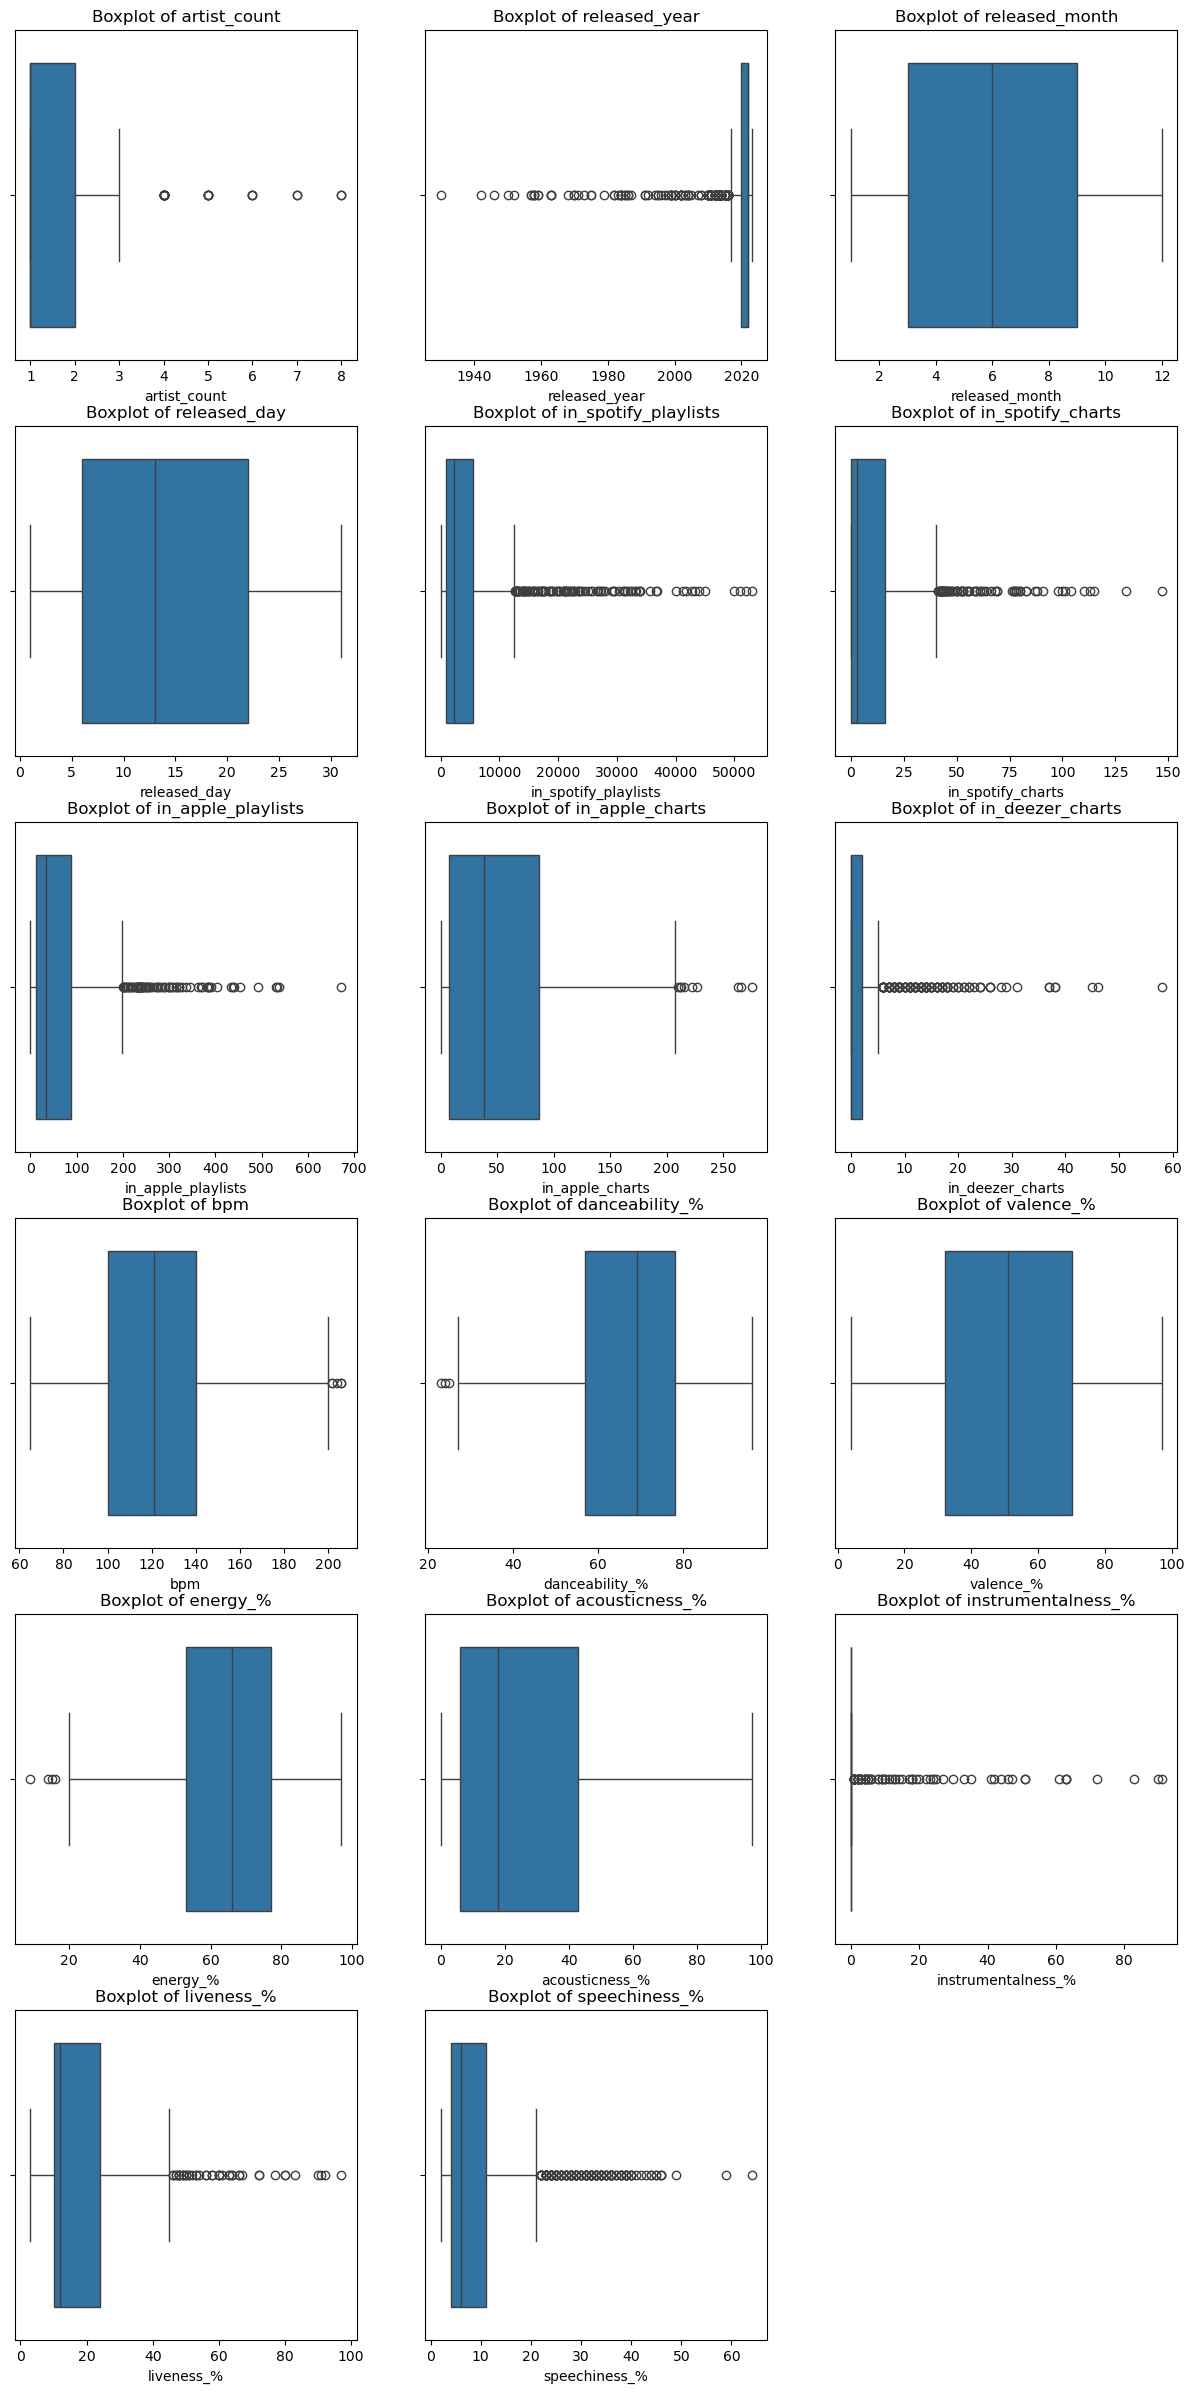

In [58]:
# I did this for better spacing of the box plots
num_cols = 3
num_rows = (len(numeric_cols) // num_cols) + (1 if len(numeric_cols) % num_cols != 0 else 0)  # calculate rows based on the number of columns
plt.figure(figsize=(15, 5 * num_rows))  # djust the figure size based on the number of rows

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplots for each column
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')

In [60]:
# Output the boxplot
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

In [74]:
# Round the values to make for better readability
desc = df.describe()
desc_rounded = desc.round(1) # Round the summary statistics to 0 decimal places

# Display the statistical summary of the dataset
print("\nRounded Statistical Summary:")
print(desc_rounded)


Rounded Statistical Summary:
       artist_count  released_year  released_month  released_day  \
count         953.0          953.0           953.0         953.0   
mean            1.6         2018.2             6.0          13.9   
std             0.9           11.1             3.6           9.2   
min             1.0         1930.0             1.0           1.0   
25%             1.0         2020.0             3.0           6.0   
50%             1.0         2022.0             6.0          13.0   
75%             2.0         2022.0             9.0          22.0   
max             8.0         2023.0            12.0          31.0   

       in_spotify_playlists  in_spotify_charts  in_apple_playlists  \
count                 953.0              953.0               953.0   
mean                 5200.1               12.0                67.8   
std                  7897.6               19.6                86.4   
min                    31.0                0.0                 0.0   
25%    